In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Bike = pd.read_csv("C:/Users/ROCKET/Documents/GitHub/SPS-5538-Case-study-to-understand-a-dataset-Basic/Dataset/Bike Sharing/day.csv")

In [4]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#clean up attribute names
Bike.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)

In [8]:
Bike.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
#Date-Time Conversion
Bike['datetime'] = pd.to_datetime(Bike.datetime)

# Category conversion
Bike['season'] = Bike.season.astype('category')
Bike['is_holiday'] = Bike.is_holiday.astype('category')
Bike['is_workingday'] = Bike.is_workingday.astype('category')
Bike['weekday'] = Bike.weekday.astype('category')
Bike['weather_condition'] = Bike.weather_condition.astype('category')
Bike['month'] = Bike.month.astype('category')
Bike['year'] = Bike.year.astype('category')


In [10]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
rec_id               731 non-null int64
datetime             731 non-null datetime64[ns]
season               731 non-null category
year                 731 non-null category
month                731 non-null category
is_holiday           731 non-null category
weekday              731 non-null category
is_workingday        731 non-null category
weather_condition    731 non-null category
temp                 731 non-null float64
atemp                731 non-null float64
humidity             731 non-null float64
windspeed            731 non-null float64
casual               731 non-null int64
registered           731 non-null int64
total_count          731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.8 KB


[Text(0.5,1,'Season wise montly distribution of raidership counts ')]

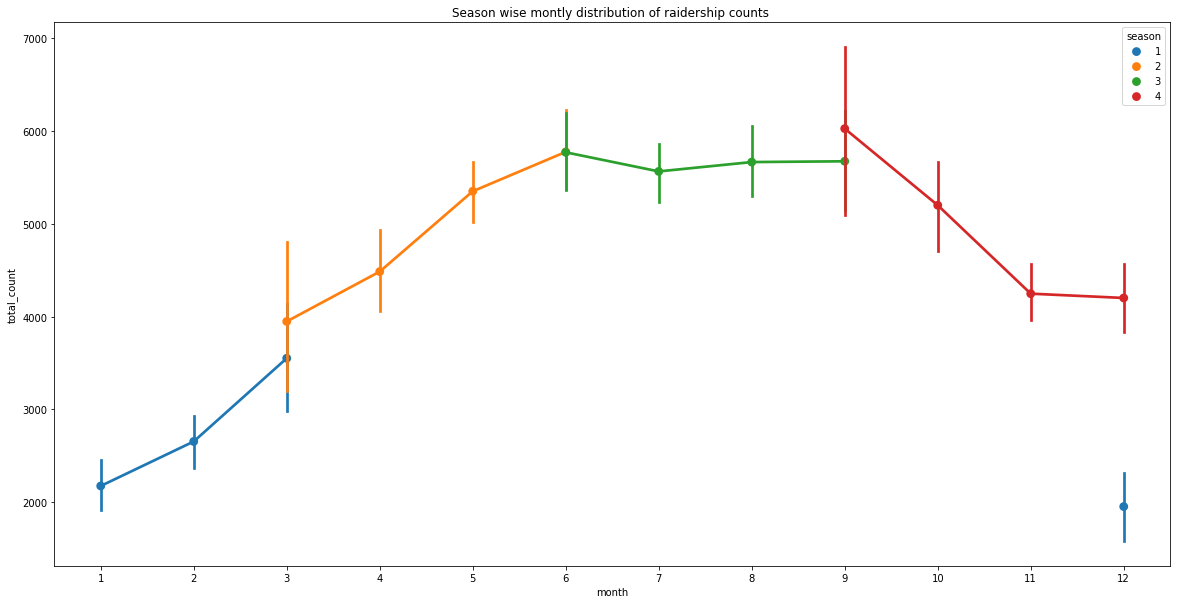

In [11]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=Bike[['season','total_count','month']],x='month',
              y='total_count',hue='season',ax=ax
             )
ax.set(title='Season wise montly distribution of raidership counts ')

[Text(0.5,1,'Month wise WeekDay distribution of raidership counts ')]

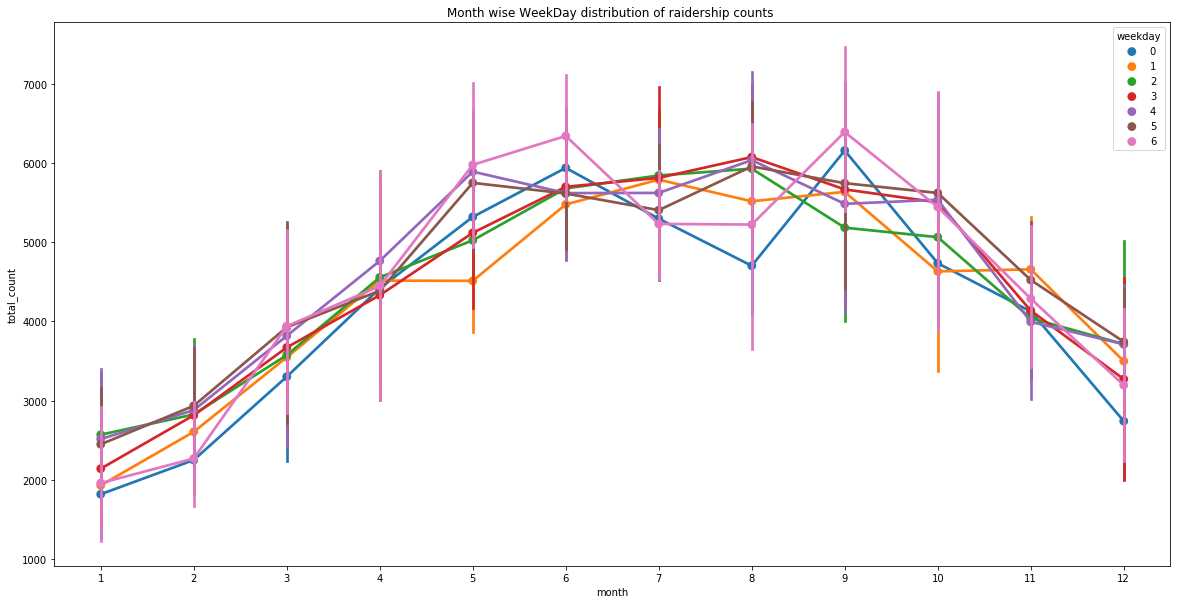

In [12]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=Bike[['weekday','total_count','month']],x='month',
              y='total_count',hue='weekday',ax=ax
             )
ax.set(title='Month wise WeekDay distribution of raidership counts ')

[Text(0.5,1,'Month-wise raidership distribution')]

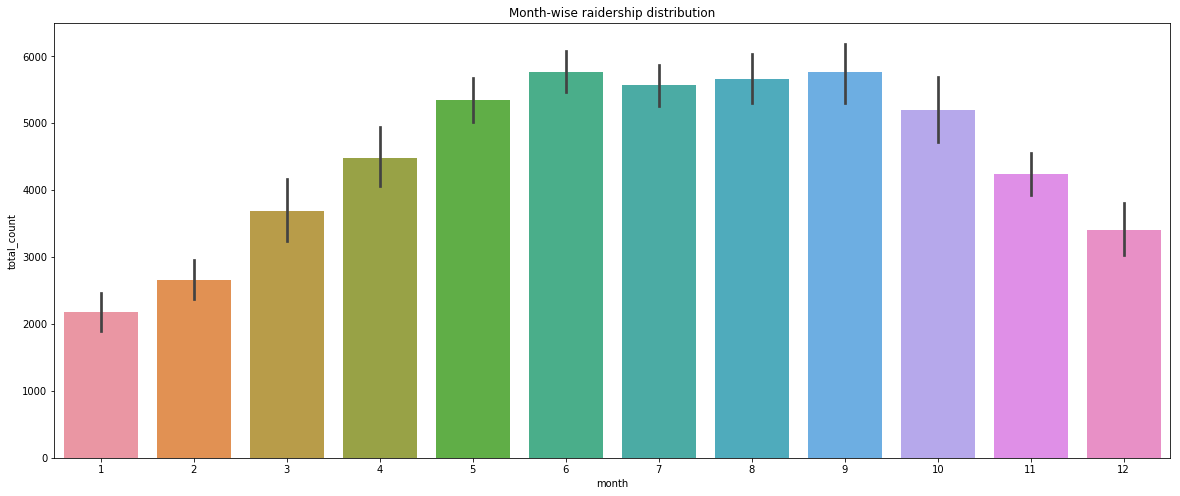

In [13]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike[['month','total_count']],x='month',y='total_count',ax=ax)
ax.set(title='Month-wise raidership distribution')

[Text(0.5,1,'Year-wise distribution of raidership counts')]

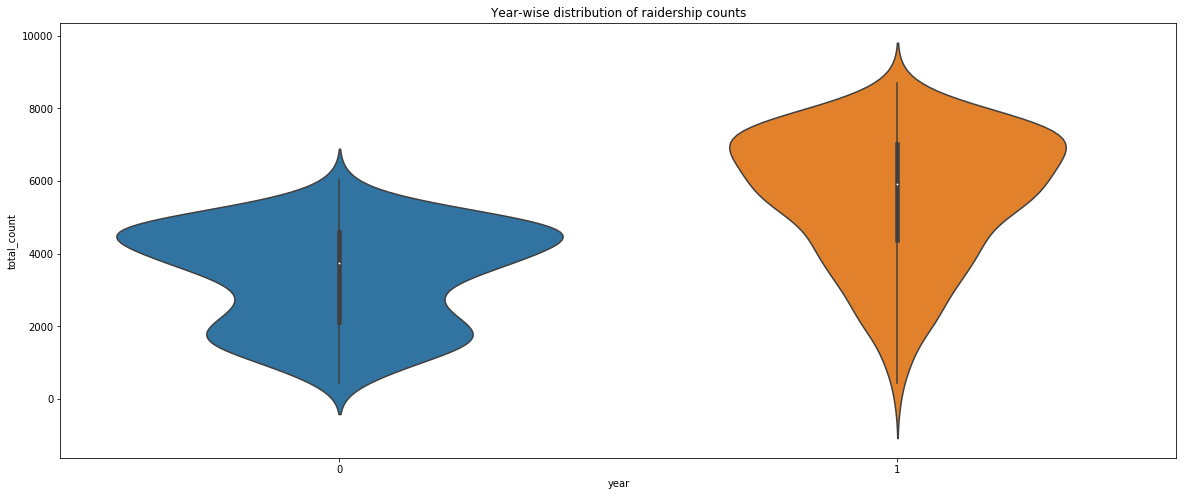

In [14]:
# Violin plot is used for Year-wise distribution
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(data=Bike[['year','total_count']],x='year',y='total_count',ax=ax)
ax.set(title='Year-wise distribution of raidership counts')
#The distribution for 2012 has peaks at highest values as compared with the distribution for 2011.

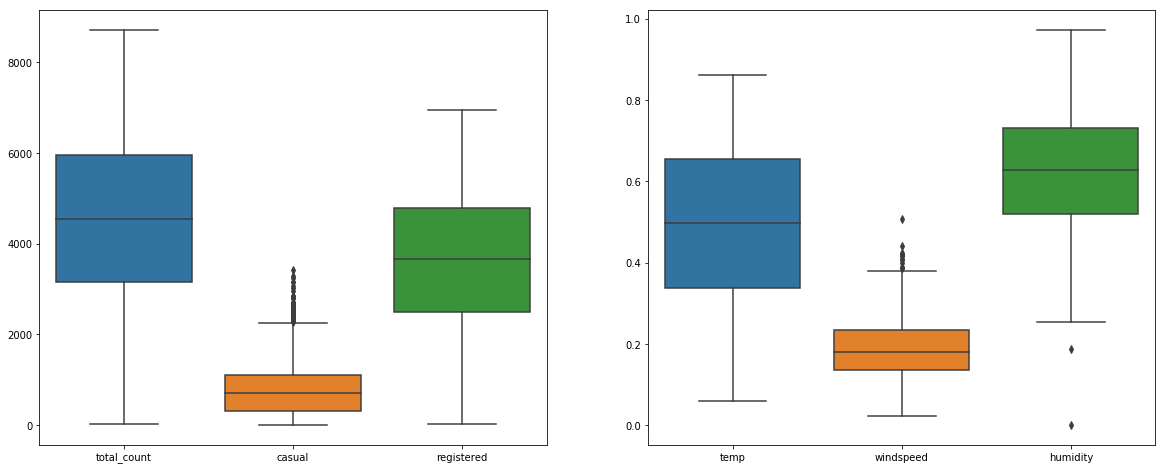

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))
sns.boxplot(data=Bike[['total_count','casual','registered']],ax=ax1)
sns.boxplot(data=Bike[['temp','windspeed','humidity']],ax=ax2)

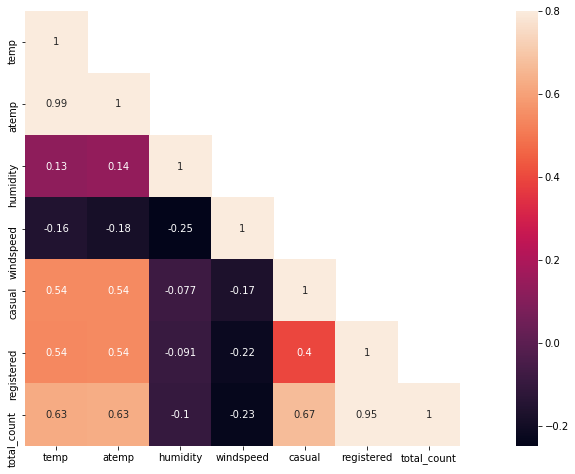

In [16]:
# Correlation matrix to find correlations between data attributes
CorrMat=Bike[['temp','atemp','humidity','windspeed',
                 'casual','registered','total_count']].corr()
mask=np.array(CorrMat)
mask[np.tril_indices_from(mask)]=False
#Heat map to plot the Correlation matrix
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(CorrMat,mask=mask,
          vmax=0.8,square=True,annot=True,ax=ax)

In [41]:
X = Bike.drop(['datetime','casual','registered','total_count'],axis=1)

In [42]:
X.head()

,rec_id,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [43]:
y = Bike[['total_count']]

In [44]:
y.head()

,total_count
0,985
1,801
2,1349
3,1562
4,1600


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                  test_size=0.3, random_state=42)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 223 to 102
Data columns (total 12 columns):
rec_id               511 non-null int64
season               511 non-null category
year                 511 non-null category
month                511 non-null category
is_holiday           511 non-null category
weekday              511 non-null category
is_workingday        511 non-null category
weather_condition    511 non-null category
temp                 511 non-null float64
atemp                511 non-null float64
humidity             511 non-null float64
windspeed            511 non-null float64
dtypes: category(7), float64(4), int64(1)
memory usage: 28.8 KB


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
modelP = model.predict(X_test)

In [69]:
residuals=y_test-modelP

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.metrics import r2_score

In [64]:
MSE(y_test,modelP)

736076.8346643457

In [66]:
MAE(y_test,modelP)

634.5298139908812

In [68]:
r2_score(y_test,modelP)

0.815008014532933

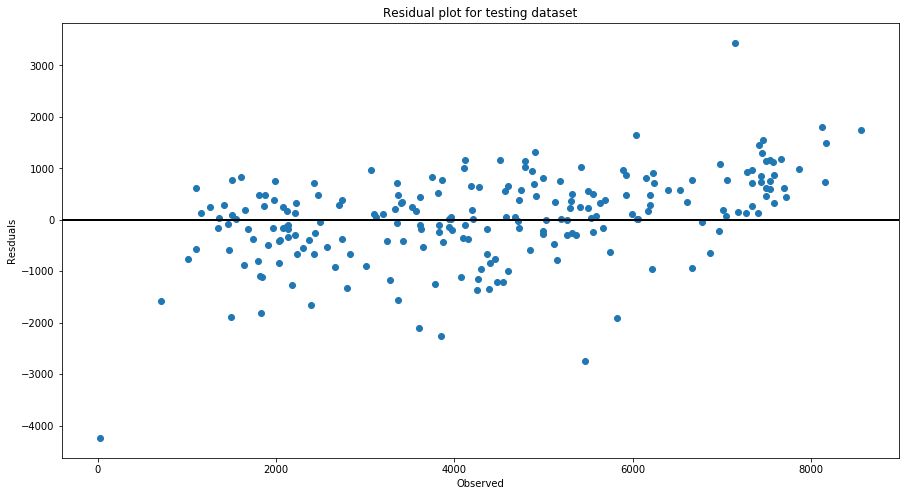

In [70]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for testing dataset')
ax.set_xlabel('Observed')
ax.set_ylabel('Resduals')
plt.show()

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5,min_samples_split=8,max_leaf_nodes=40,min_samples_leaf=3)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=40, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
dtrP = dtr.predict(X_test)

In [97]:
r2_score(y_test,dtrP)

0.7874286743829289

In [104]:
# import the model
from sklearn.ensemble import RandomForestRegressor
# Assign no. of decision trees = 1000
rf=RandomForestRegressor(n_estimators=1000, random_state=42)
# Train the model on the training data
rf.fit(X_train,y_train)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
rfP = rf.predict(X_test)

In [107]:
r2_score(y_test,rfP)

0.8895306575737597

In [109]:
#Dataframe for models
Model = ['Linear Regression','Decision tree','Random Forest']
df1=pd.DataFrame(Model,columns=['Model'])
R2_score = [0.815,0.787,0.889]
df2=pd.DataFrame(R2_score,columns=['R2_score'])
Model_df=pd.merge(df1,df2,left_index=True,right_index=True)
print('Model evaluation on test data:\n',Model_df)

Model evaluation on test data:
                Model  R2_score
0  Linear Regression     0.815
1      Decision tree     0.787
2      Random Forest     0.889
